In [2]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.1


In [3]:
df_cd_temp = pd.read_csv('CIFAR_merged_newdiff.csv')
# df_cd_temp = pd.read_csv('cifar10_merged.csv')

# normal model

In [3]:
myacc = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_norm_new'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


7/7 [==============================] - 1s 44ms/step - loss: 2.2959 - accuracy: 0.6326


7/7 [==============================] - 1s 48ms/step - loss: 2.2541 - accuracy: 0.6604


In [4]:
myacc

array([[0.90104169, 0.82692307, 0.80303031, 0.82843137, 0.83333331,
        0.83809525, 0.79781419, 0.7606383 , 0.71078432, 0.58149779],
       [0.81220657, 0.82938391, 0.82439023, 0.79820627, 0.85263157,
        0.80346823, 0.76683939, 0.83663368, 0.74752474, 0.70744681],
       [0.82464457, 0.79126215, 0.82653064, 0.8125    , 0.7904762 ,
        0.7720207 , 0.755     , 0.78172588, 0.76630437, 0.66666669],
       [0.77142859, 0.82089549, 0.83091789, 0.80676329, 0.86274511,
        0.82631576, 0.79000002, 0.79385966, 0.70430106, 0.7227723 ],
       [0.77981651, 0.81443298, 0.84210527, 0.81182796, 0.82775122,
        0.81818181, 0.79487181, 0.80769229, 0.76344085, 0.69430053],
       [0.80269057, 0.87559807, 0.83937824, 0.80597013, 0.81218272,
        0.815     , 0.75124377, 0.78609627, 0.76216215, 0.72549021],
       [0.78125   , 0.79381442, 0.83068782, 0.81860465, 0.7971698 ,
        0.80459768, 0.80861247, 0.75598085, 0.6980198 , 0.7647059 ],
       [0.81632656, 0.82439023, 0.8333333

In [5]:
nn = 0
meanPerBin = np.zeros(10)
for myturn in range (10):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/10)
print(meanPerBin)

0.7860951215028763
[0.79911429 0.8317701  0.8279106  0.81521758 0.81394129 0.79659775
 0.78136204 0.7744887  0.74064942 0.67989944]


In [ ]:
#previous run results mean = 0.7860951215028763
# meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129, 0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]

In [6]:
myhist = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[192., 208., 198., 204., 186., 210., 183., 188., 204., 227.],
       [213., 211., 205., 223., 190., 173., 193., 202., 202., 188.],
       [211., 206., 196., 208., 210., 193., 200., 197., 184., 195.],
       [175., 201., 207., 207., 204., 190., 200., 228., 186., 202.],
       [218., 194., 228., 186., 209., 209., 195., 182., 186., 193.],
       [223., 209., 193., 201., 197., 200., 201., 187., 185., 204.],
       [192., 194., 189., 215., 212., 174., 209., 209., 202., 204.],
       [196., 205., 222., 197., 177., 189., 186., 200., 211., 217.],
       [207., 202., 201., 192., 187., 208., 214., 230., 179., 181.],
       [222., 196., 196., 200., 199., 182., 235., 188., 195., 187.],
       [200., 213., 206., 222., 220., 192., 192., 183., 192., 180.],
       [199., 214., 178., 215., 179., 192., 220., 189., 194., 221.],
       [212., 195., 190., 183., 209., 200., 203., 205., 206., 197.],
       [197., 196., 182., 196., 219., 206., 207., 206., 202., 189.],
       [213., 180., 198., 180., 19

In [7]:
myhistAccum = np.zeros (10)
for histindex in range (10):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[4039. 4013. 3998. 4043. 3994. 3909. 4044. 4010. 3954. 4001.]


In [19]:
myhistAccum = np.array([4039, 4013, 3998, 4043, 3994, 3909, 4044, 4010, 3954, 4001])

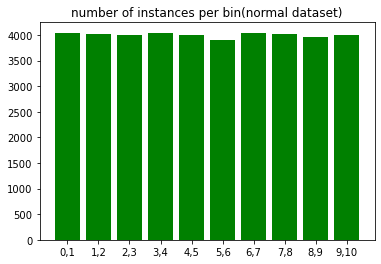

In [8]:
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

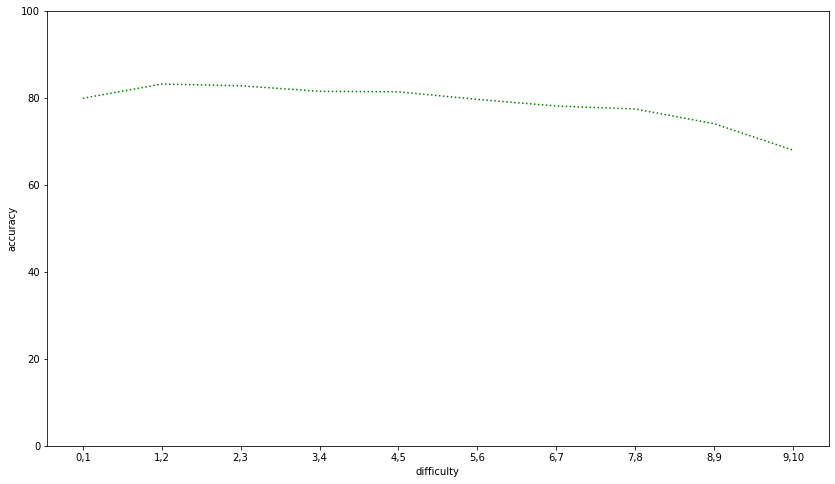

In [11]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
plt.ylim([0, 100])
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [15]:
meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
meanPerBin = np.array(meanPerBin)

# contaminated model

In [3]:
myaccCont = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


3/3 [==============================] - 0s 34ms/step - loss: 0.6786 - accuracy: 0.8750


12/12 [==============================] - 1s 30ms/step - loss: 1.8910 - accuracy: 0.6855


In [4]:
myaccCont

array([[0.83333331, 0.81818181, 0.83999997, 0.83168316, 0.79347825,
        0.81308413, 0.81672025, 0.76011562, 0.75543481, 0.68503934],
       [0.77884614, 0.85483873, 0.77777779, 0.78048778, 0.89583331,
        0.73809522, 0.81881535, 0.8033241 , 0.69309461, 0.68882173],
       [0.8108108 , 0.79090911, 0.85263157, 0.8018018 , 0.82222223,
        0.80681819, 0.79220778, 0.76190478, 0.77650428, 0.69026548],
       [0.80263156, 0.84782606, 0.87155962, 0.872549  , 0.83177572,
        0.85567009, 0.81849313, 0.75199997, 0.74857146, 0.69999999],
       [0.75206614, 0.84946239, 0.84821427, 0.83809525, 0.875     ,
        0.8252427 , 0.80471379, 0.78877008, 0.74705881, 0.69916433],
       [0.73584908, 0.8425926 , 0.85714287, 0.80582523, 0.79347825,
        0.80000001, 0.79936308, 0.70666665, 0.74084508, 0.70200574],
       [0.76666665, 0.81818181, 0.83516484, 0.8037383 , 0.72815531,
        0.77777779, 0.77926421, 0.73209548, 0.722372  , 0.7211796 ],
       [0.78846157, 0.85294116, 0.8125   

In [5]:
nnCont = 0
meanPerBinCont = np.zeros(10)
for myturn in range (10):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/10)
print(meanPerBinCont)

0.7879575726389885
[0.7800258  0.83596367 0.83271156 0.81696018 0.82122909 0.79755006
 0.79041608 0.76958496 0.74295535 0.69217899]


In [6]:
myhistCont = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[ 96.,  99., 100., 101.,  92., 107., 311., 346., 368., 381.],
       [104., 124.,  99., 123.,  96.,  84., 287., 361., 391., 331.],
       [111., 110.,  95., 111.,  90.,  88., 308., 399., 349., 339.],
       [ 76.,  92., 109., 102., 107.,  97., 292., 375., 350., 400.],
       [121.,  93., 112., 105.,  96., 103., 297., 374., 340., 359.],
       [106., 108.,  98., 103.,  92., 100., 314., 375., 355., 349.],
       [ 90.,  99.,  91., 107., 103.,  90., 299., 377., 371., 373.],
       [104., 102., 112.,  97.,  92.,  87., 326., 361., 347., 372.],
       [103., 108.,  90.,  93.,  90.,  99., 324., 391., 341., 362.],
       [109.,  88., 111.,  85., 102.,  97., 322., 383., 353., 351.],
       [ 93.,  98., 109., 111., 113.,  93., 290., 359., 387., 347.],
       [102., 117.,  89., 106.,  85., 103., 329., 338., 346., 386.],
       [102., 104.,  87.,  96., 110., 111., 309., 364., 365., 352.],
       [ 97.,  95.,  96.,  84., 114., 109., 299., 348., 392., 366.],
       [101.,  87.,  97.,  81.,  9

In [7]:
myhistAccumCont = np.zeros (10)
for histindex in range (10):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[2007. 2009. 2015. 2007. 1951. 1994. 6216. 7267. 7235. 7305.]


In [8]:
histbymyaccCont = myhistCont * myaccCont
histbymyaccCont

array([[ 79.99999809,  80.99999946,  83.99999738,  83.99999905,
         72.99999905,  87.00000143, 253.9999969 , 263.00000572,
        278.00001049, 260.99998909],
       [ 80.99999905, 106.00000238,  77.00000131,  95.99999642,
         85.99999809,  61.99999881, 235.0000056 , 290.00000131,
        270.99999297, 227.99999362],
       [ 89.99999928,  87.00000226,  80.99999905,  88.99999988,
         74.00000095,  71.00000048, 243.99999547, 304.00000566,
        270.99999309, 233.9999966 ],
       [ 60.99999833,  77.99999785,  94.99999857,  88.99999774,
         89.00000256,  82.99999917, 238.99999332, 281.99999034,
        262.00000942, 279.99999523],
       [ 91.00000238,  79.00000226,  94.99999809,  88.00000101,
         84.        ,  84.99999791, 238.99999434, 295.00000978,
        253.99999499, 250.99999481],
       [ 78.00000274,  91.00000048,  84.00000083,  82.99999905,
         72.99999905,  80.00000119, 251.00000608, 264.99999315,
        263.00000489, 245.00000465],
       [ 6

In [9]:
myhistAccumContNew = np.zeros (10)
for histindex in range (10):
    myhistAccumContNew[histindex] = np.sum(histbymyaccCont[:, histindex]) / myhistAccumCont[histindex]
print(myhistAccumContNew)
print(sum(myhistAccumContNew)/10)

[0.77927255 0.83474365 0.83275434 0.81614349 0.82162993 0.79839519
 0.79005791 0.76923077 0.74250173 0.69212868]
0.7876858239312223


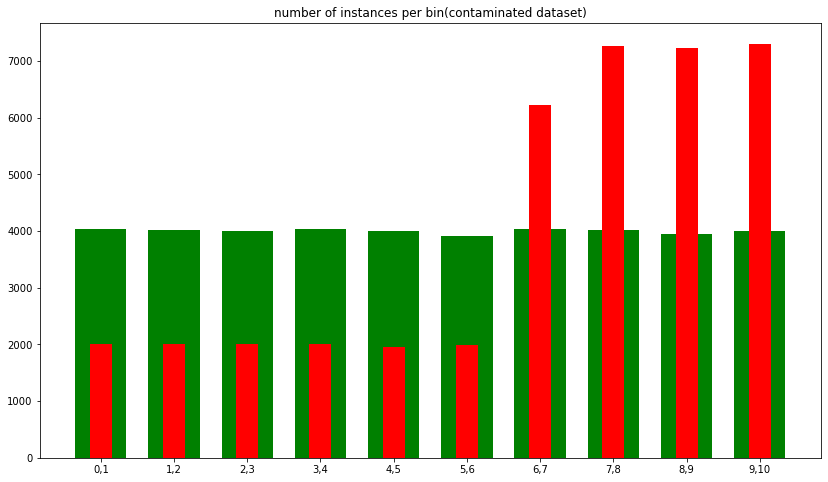

In [20]:
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

In [30]:
# meanPerBinNew = [0.71428572, 0.72000001, 0.60714287, 0.62500002, 0.8309091 ,
#        0.82231537, 0.81719316, 0.78188153, 0.76519568, 0.71659919,
#        0.69835466, 0.6452514 ]
# type(meanPerBinContNew)
# meanPerBinNew = np.array(meanPerBinNew)

In [29]:
meanPerBinContNew = np.zeros (10)
meanPerBinContNew = [0.80118111, 0.8146718,  0.85048545, 0.82841328, 0.84199584, 0.79749479, 0.8180602,  0.78814017, 0.76028922, 0.70718231]
meanPerBinContNew = np.array(meanPerBinContNew)


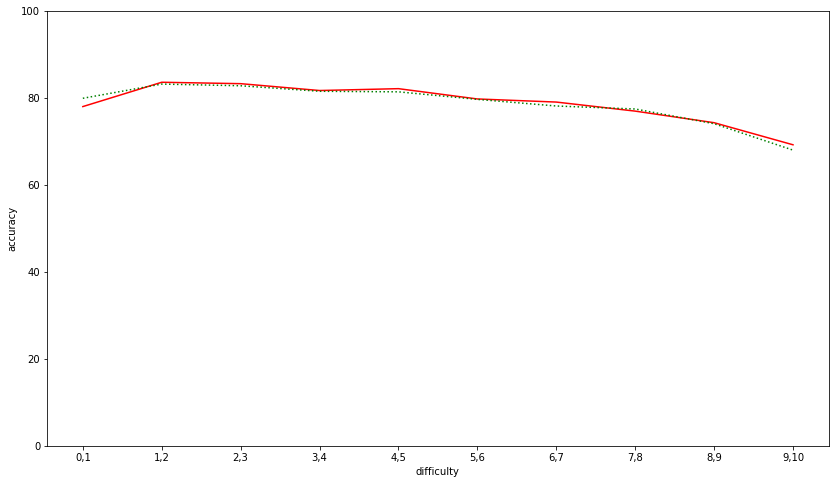

In [16]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
plt.ylim([0, 100])
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [151]:
# acc_new_cont = myaccCont*myhistCont

In [153]:
# acc_new_12Cont = np.zeros (12)
# for histindex in range (12):
#     acc_new_12Cont[histindex] = np.sum(acc_new_cont[:, histindex])
# print(acc_new_12Cont)
# print(acc_new_12Cont/myhistAccumCont)
# meanPerBinContNew = acc_new_12Cont/myhistAccumCont
# print(np.mean(acc_new_12Cont/myhistAccumCont))

[  15.00000012    9.00000012    5.00000006   16.99999997  238.9999994
 1313.9999795   781.99999857 1516.0000177  1691.00000036 1027.99998724
  679.9999935   433.00000691]
[0.75000001 0.75000001 0.50000001 0.5862069  0.84154929 0.83694266
 0.83103082 0.79957807 0.77073838 0.73011363 0.68895643 0.66718029]
0.7293580398532926


# Contaminate model on normal data

In [21]:
myaccCont_nor = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_contam_new'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


7/7 [==============================] - 0s 31ms/step - loss: 2.1446 - accuracy: 0.7070


7/7 [==============================] - 0s 31ms/step - loss: 2.1722 - accuracy: 0.6792


In [22]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(10)
for myturn in range (10):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/10)
print(meanPerBinCont_nor)

0.7863082087039948
[0.79357795 0.83053856 0.82169406 0.82186363 0.82370602 0.79388916
 0.77930374 0.77309898 0.74168162 0.68372838]


In [23]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[192., 208., 198., 204., 186., 210., 183., 188., 204., 227.],
       [213., 211., 205., 223., 190., 173., 193., 202., 202., 188.],
       [211., 206., 196., 208., 210., 193., 200., 197., 184., 195.],
       [175., 201., 207., 207., 204., 190., 200., 228., 186., 202.],
       [218., 194., 228., 186., 209., 209., 195., 182., 186., 193.]])

In [24]:
myhistAccumCont_nor = np.zeros (10)
for histindex in range (10):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[1009. 1020. 1034. 1028.  999.  975.  971.  997.  962. 1005.]


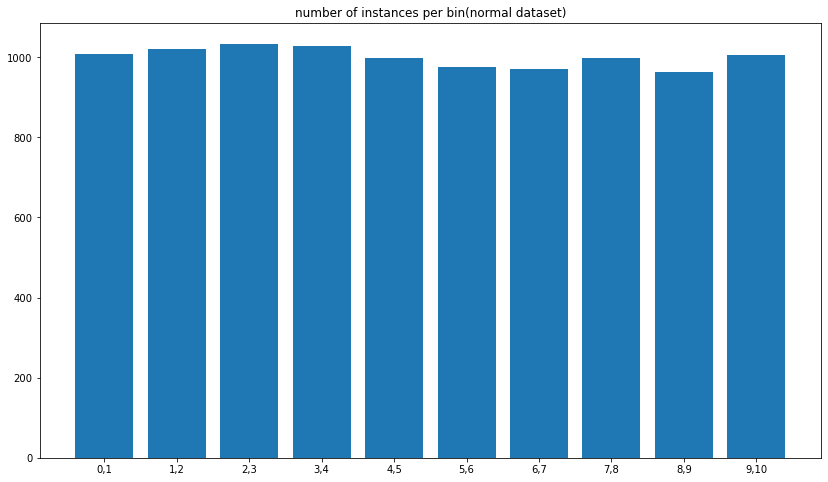

In [25]:
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

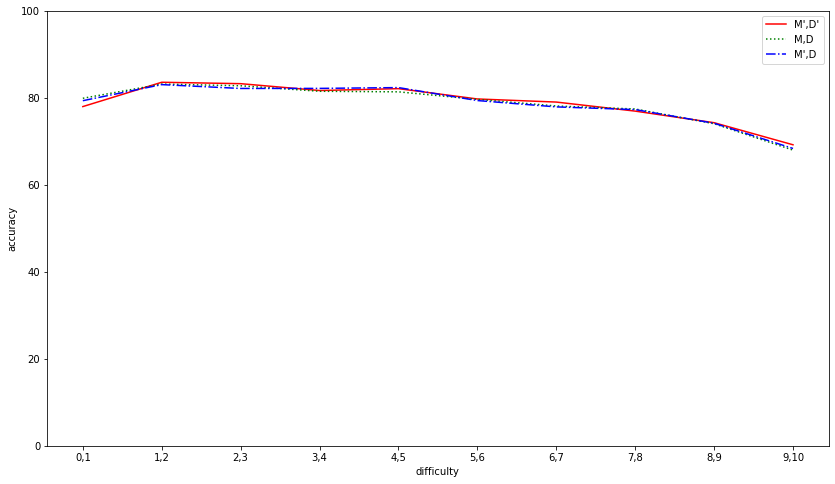

In [26]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [27]:
myaccBal = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_bal_new'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


12/12 [==============================] - 1s 30ms/step - loss: 1.4844 - accuracy: 0.7680


12/12 [==============================] - 1s 29ms/step - loss: 2.4913 - accuracy: 0.6480


In [28]:
nnBal = 0
meanPerBinBal = np.zeros(10)
for myturn in range (10):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/10

0.7849897414445877
0.8385568052530289
0.8255339682102203
0.8210775882005692
0.8141483902931214
0.8092432349920273
0.8146920770406723
0.7600729137659072
0.7336525976657867
0.6920058965682984


0.789397321343422

In [29]:
myhistBal = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[ 96.,  99., 100., 101.,  92., 118., 282., 370., 356., 386.],
       [104., 124.,  99., 123.,  96., 102., 275., 361., 338., 378.],
       [111., 110.,  95., 111.,  90., 101., 290., 363., 366., 363.],
       [ 76.,  92., 109., 102., 107., 110., 300., 353., 376., 375.],
       [121.,  93., 112., 105.,  96., 123., 293., 337., 365., 355.],
       [106., 108.,  98., 103.,  92., 119., 296., 372., 358., 348.],
       [ 90.,  99.,  91., 107., 103., 109., 289., 391., 355., 366.],
       [104., 102., 112.,  97.,  92., 109., 301., 354., 353., 376.],
       [103., 108.,  90.,  93.,  90., 119., 308., 383., 354., 352.],
       [109.,  88., 111.,  85., 102., 116., 313., 349., 370., 357.],
       [ 93.,  98., 109., 111., 113., 108., 292., 361., 367., 348.],
       [102., 117.,  89., 106.,  85., 114., 295., 351., 364., 377.],
       [102., 104.,  87.,  96., 110., 130., 313., 354., 347., 357.],
       [ 97.,  95.,  96.,  84., 114., 124., 287., 357., 379., 367.],
       [101.,  87.,  97.,  81.,  9

In [30]:
myhistAccumBal = np.zeros (10)
for histindex in range (10):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[2007. 2009. 2015. 2007. 1951. 2333. 5858. 7232. 7255. 7336.]


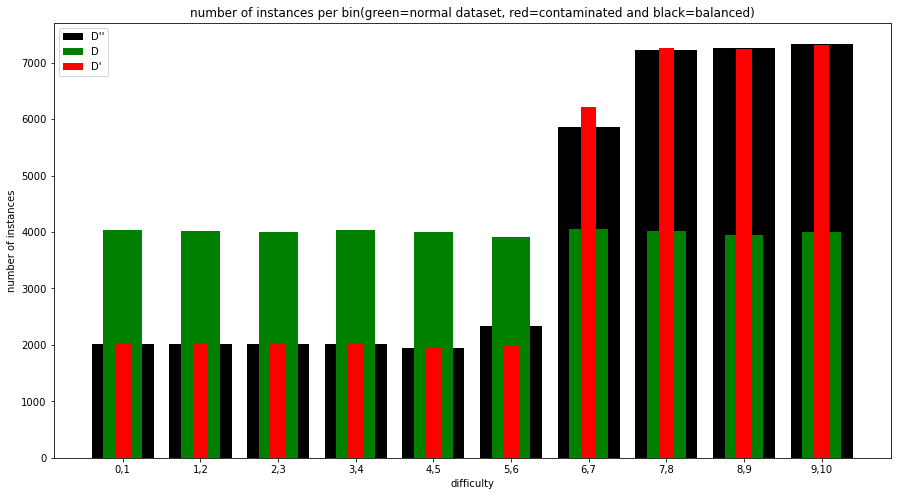

In [47]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

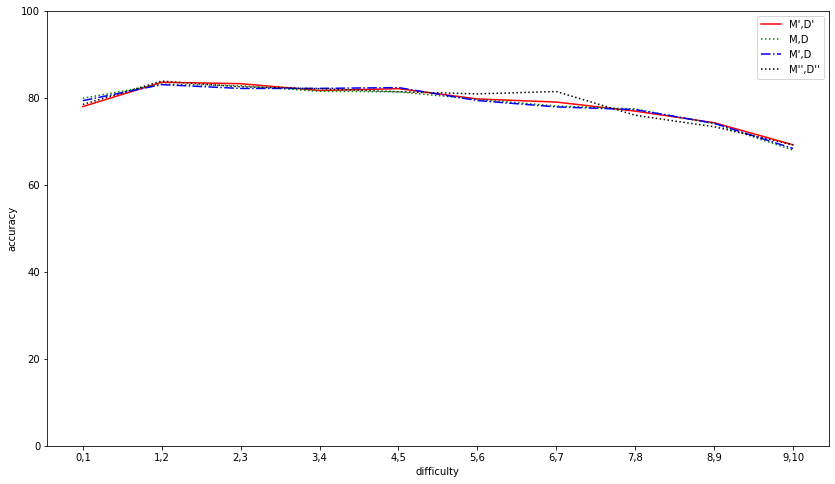

In [32]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [33]:
myaccBal_nor = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('Cifar_bal_new'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


7/7 [==============================] - 0s 29ms/step - loss: 2.5188 - accuracy: 0.6093


7/7 [==============================] - 0s 30ms/step - loss: 2.0419 - accuracy: 0.7075


In [34]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(10)
for myturn in range (10):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
pritn(nnBal_nor/10)
meanPerBinBal_nor

0.7934871554374695
0.8316671222448349
0.8220570415258408
0.8188399732112884
0.8124323427677155
0.7986976593732834
0.789108544588089
0.7795111835002899
0.7379090458154678
0.693396320939064


0.7877106389403343

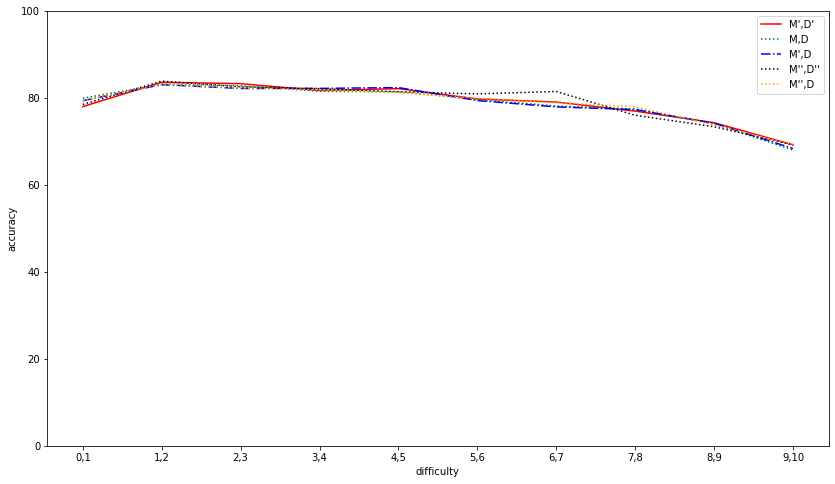

In [35]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

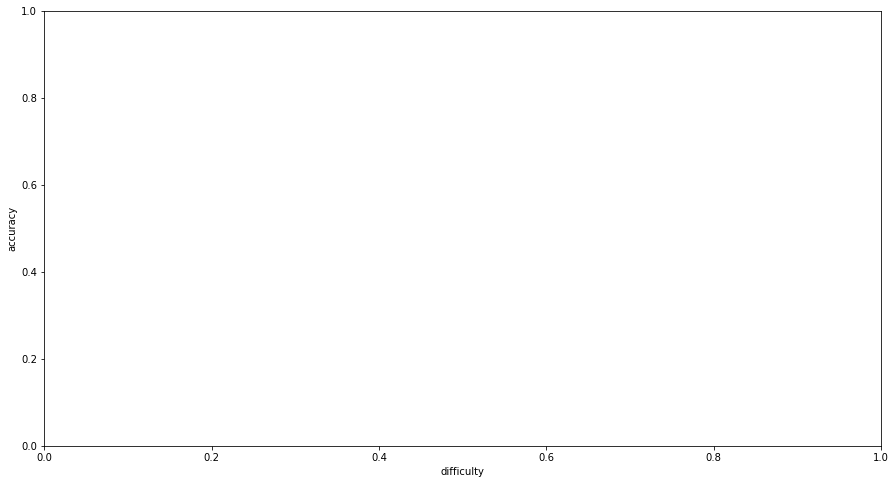

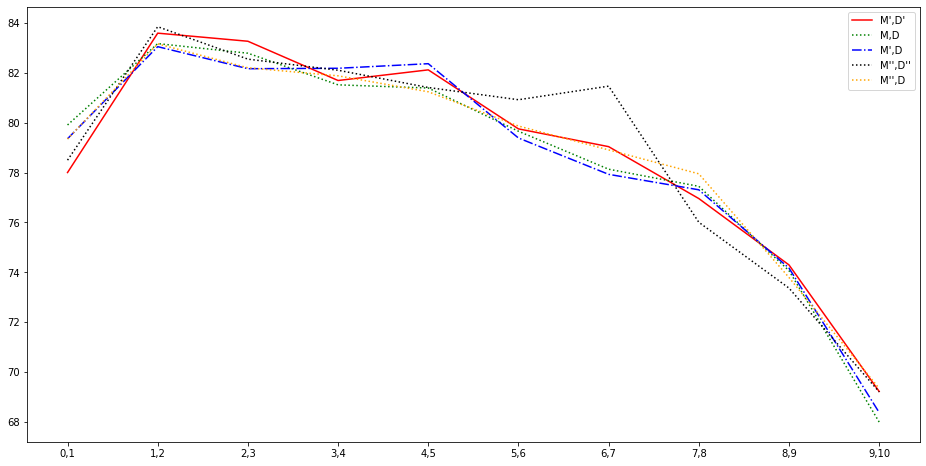

In [38]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [7]:
myaccEasyOut = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    df_cd1 =  df_easyout#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = df_cd1.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (2,10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


13/13 [==============================] - 1s 26ms/step - loss: 1.2417 - accuracy: 0.8135


13/13 [==============================] - 0s 26ms/step - loss: 1.6864 - accuracy: 0.7288


In [8]:
myaccEasyOut = myaccCont

In [12]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(10)
for myturn in range (10):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/10

0.0
0.0
0.7933421820402146
0.8075617879629136
0.8131353974342346
0.793610256910324
0.7926205396652222
0.7819989711046219
0.7397687673568726
0.7003318101167679


0.6222369712591173

In [13]:
meanPerBinEasyout

array([0.        , 0.        , 0.79334218, 0.80756179, 0.8131354 ,
       0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])

# Easyout on Normal

In [21]:
myaccEasy_nor = np.zeros((20,10))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[22000:24000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (10):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff)) & (df_test['Dffclt'] <= (mydiff+1))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        y_train = df_train['class']
        y_test = df_test_temp['class']
        x_train0 = df_train.drop(columns="class")
        x_test0 = df_test_temp.drop(columns="class")
        x_train0 = np.array(x_train0)
        x_test0 = np.array(x_test0)
        x_train0 = x_train0.reshape((x_train0.shape[0],3, 32, 32))
        x_train = np.empty([x_train0.shape[0], 32, 32, 3])
        for num in range(x_train0.shape[0]):
            x_train[num] = x_train0[num].T
            x_train[num] = np.rot90(x_train[num], k=3, axes=(0, 1))
        x_test0 = x_test0.reshape((x_test0.shape[0],3 , 32, 32))
        x_test = np.empty([x_test0.shape[0], 32, 32, 3])
        for num in range(x_test0.shape[0]):
            x_test[num] = x_test0[num].T
            x_test[num] = np.rot90(x_test[num], k=3, axes=(0, 1))
        # Reduce pixel values
        x_train, x_test = x_train / 255.0, x_test / 255.0
        # flatten the label values
        y_train, y_test = y_train.values.flatten(), y_test.values.flatten()
        from keras.models import load_model
        model = load_model('easyOut'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(x_test,y_test)[1])


7/7 [==============================] - 0s 23ms/step - loss: 1.5324 - accuracy: 0.7811


7/7 [==============================] - 0s 21ms/step - loss: 1.5654 - accuracy: 0.7286


7/7 [==============================] - 0s 21ms/step - loss: 1.9990 - accuracy: 0.6786


In [23]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(10)
for myturn in range (10):
    print((np.mean(myaccEasy_nor[:, myturn])))
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/10)
meanPerBinEasy_nor

0.7849938303232193
0.8256150394678116
0.8293123096227646
0.8203264266252518
0.813022968173027
0.7877639710903168
0.7923341870307923
0.7754883885383606
0.7497053772211075
0.695385929942131
0.7873948428034783


array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297,
       0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

# retrieve Data

In [18]:
meanPerBin = np.array([0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944])
meanPerBinCont = np.array([0.7800258,  0.83596367, 0.83271156, 0.81696018, 0.82122909, 0.79755006, 0.79041608, 0.76958496, 0.74295535, 0.69217899])
meanPerBinCont_nor = np.array([0.79357795, 0.83053856, 0.82169406, 0.82186363, 0.82370602, 0.79388916, 0.77930374, 0.77309898, 0.74168162, 0.68372838])
meanPerBinBal = np.array([0.78498974, 0.83855680, 0.82553396, 0.82107758, 0.81414839, 0.80924323, 0.81469207, 0.76007291, 0.73365259, 0.69200589])
meanPerBinBal_nor = np.array([0.79348715, 0.83166712, 0.82205704, 0.81883997, 0.81243234, 0.79869765, 0.78910854, 0.77951118, 0.73790904, 0.69339632])
meanPerBinEasyout = np.array([0.79334218 , 0.79334218 , 0.79334218, 0.80756179, 0.8131354 , 0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])
meanPerBinEasy_nor = np.array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297, 0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

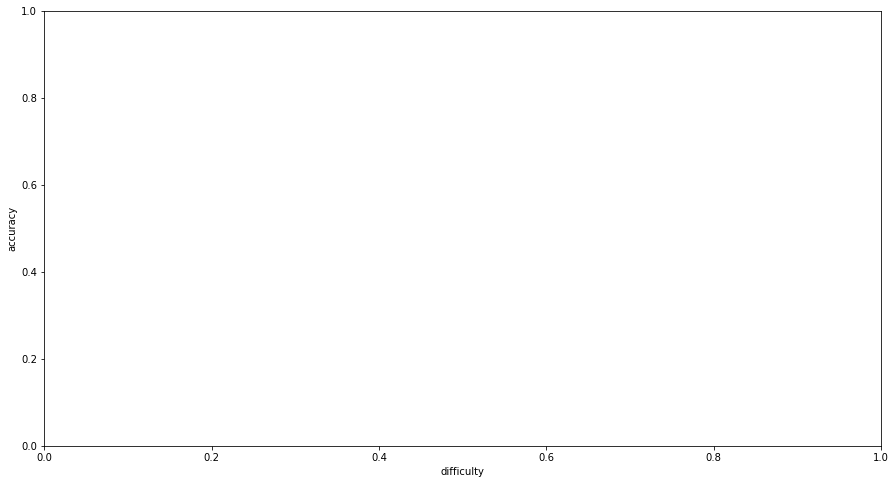

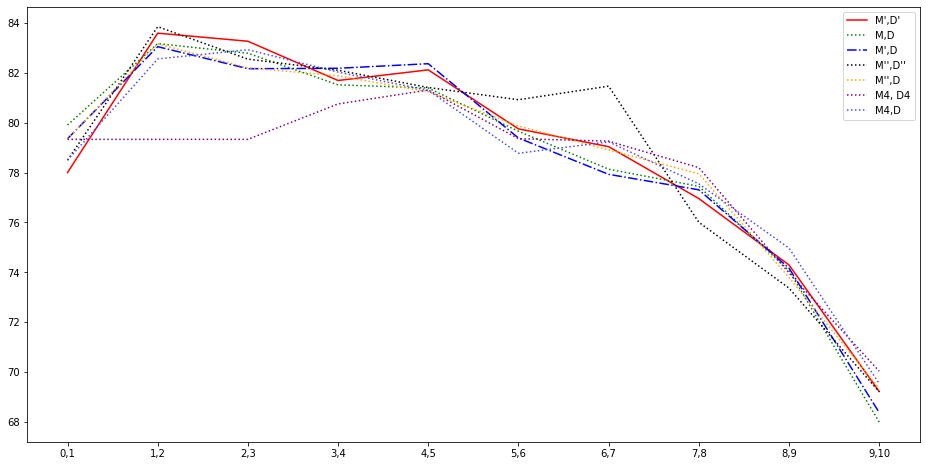

In [28]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.show()

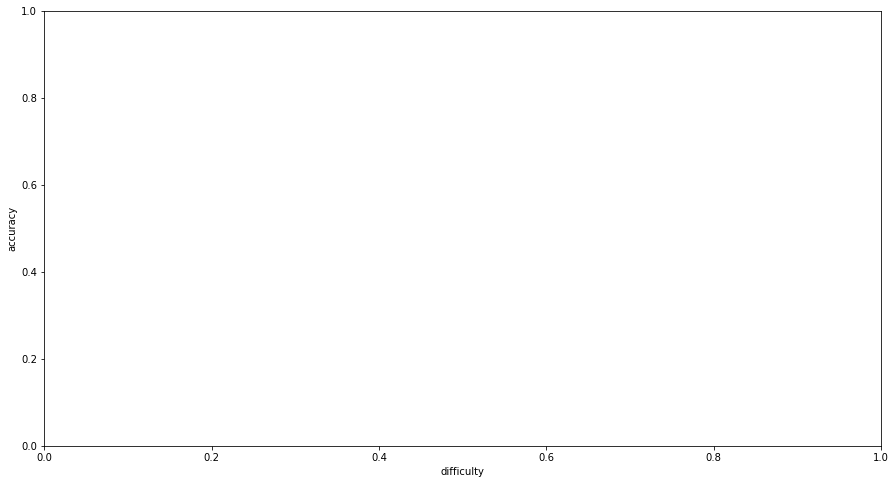

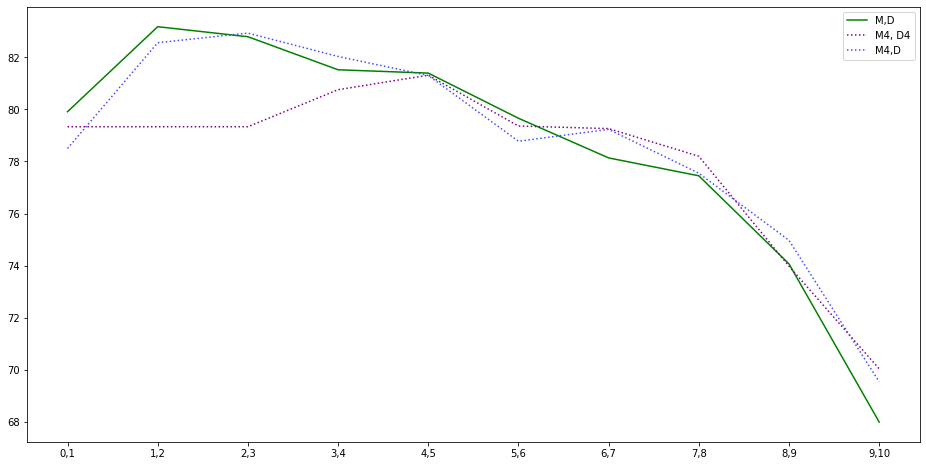

In [31]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,1','1,2','2,3','3,4','4,5','5,6','6,7','7,8','8,9','9,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()

In [96]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumCont[ttt] * meanPerBinCont[ttt])
print(addition/10000)

0.7735473649561405


In [104]:
# print(myhistAccum)
# print(meanPerBin)
addition = 0
for ttt in range (12):
    addition += (myhistAccumBal[ttt] * meanPerBinBal[ttt])
print(addition/10000)

0.7807967591792345


In [123]:
print(myhistAccumCont*meanPerBinCont)

[  15.4000001     9.8000001     6.33333337   17.06166664  239.32292824
 1313.43389761  781.8941541  1515.1754302  1691.76763027 1028.91033478
  678.10812228  432.61471226]


In [108]:
myhistAccumCont

array([  20.,    5.,   15.,   40.,  345., 1550.,  975., 1950., 2130.,
       1290., 1080.,  600.])

In [124]:
print(sum(myhistAccumCont))
print(sum(myhistAccum))

10000.0
10000.0


In [106]:
meanPerBinCont

array([0.77      , 0.81666667, 0.63333334, 0.58833333, 0.84268637,
       0.8365821 , 0.83091834, 0.79914316, 0.77108825, 0.73076018,
       0.68703964, 0.66658661])

In [109]:
myhistAccum

array([  35.,   25.,   28.,   48.,  550., 3101., 1931., 1435., 1201.,
        741.,  547.,  358.])

In [107]:
meanPerBin

array([0.72619048, 0.76095239, 0.58285715, 0.61619049, 0.83195212,
       0.82245232, 0.81758156, 0.78117882, 0.76437445, 0.71728251,
       0.69882983, 0.65006368])

In [215]:
df_cd_temp


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,-0.850018,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,2.216391,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,-0.684760,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,3.926303,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,1.266376,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,3.352000,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,3.503452,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,1.109084,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,3.416564,1


In [3]:
newDiff = np.arange  (54051)
newDiff

array([    0,     1,     2, ..., 54048, 54049, 54050])

In [4]:
newDiff2 = newDiff*10/54050
newDiff2

array([0.00000000e+00, 1.85013876e-04, 3.70027752e-04, ...,
       9.99962997e+00, 9.99981499e+00, 1.00000000e+01])

In [5]:
df_with_newdiff = df_cd_temp.sort_values('Dffclt', ascending=True)
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,-5.976701,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,-5.976701,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,-5.976701,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,-5.964522,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,-5.964522,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,5.997048,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,5.997048,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,5.997194,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,5.997194,6


In [6]:
for myturn in range (54051):
    df_with_newdiff.iloc[myturn,3072] = newDiff2[myturn]

In [241]:
newDiff2[100]

0.018501387604070305

In [248]:
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
34419,252,251,251,251,250,249,250,247,238,218,...,251,250,250,251,251,251,251,251,0.000000,9
16402,89,87,92,92,89,91,93,92,99,99,...,54,49,44,46,37,34,40,39,0.000185,3
52436,108,105,144,146,136,124,126,116,134,186,...,102,97,118,132,126,138,155,123,0.000370,2
4643,104,100,102,96,92,96,88,85,81,86,...,3,4,6,10,21,29,58,136,0.000555,1
22660,184,165,178,172,164,185,189,178,183,189,...,188,188,185,184,186,186,168,171,0.000740,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,146,179,156,177,178,107,85,79,67,71,...,137,129,123,130,113,120,128,105,9.999260,5
35470,198,249,255,255,255,255,255,255,255,255,...,52,56,63,57,56,63,70,65,9.999445,9
50266,157,151,149,147,145,145,140,137,133,134,...,48,52,58,69,66,73,78,77,9.999630,2
32249,129,163,167,142,125,89,88,104,104,109,...,125,126,123,132,132,132,127,116,9.999815,6


In [7]:
df_with_newdiff = df_with_newdiff.sort_index()
df_with_newdiff

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a3064,a3065,a3066,a3067,a3068,a3069,a3070,a3071,Dffclt,class
0,26,17,13,13,13,14,14,15,14,10,...,144,33,29,46,28,27,26,27,1.105828,8
1,94,101,95,94,94,97,111,142,166,154,...,147,150,152,163,174,182,184,155,7.431267,5
2,183,158,166,167,169,171,163,163,160,161,...,177,227,250,250,250,250,250,250,1.594450,0
3,255,254,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,9.052174,6
4,182,156,156,144,118,132,148,118,136,85,...,83,75,79,72,68,73,67,75,6.050139,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54046,76,76,77,76,75,76,76,76,76,78,...,177,223,239,239,235,236,234,236,8.629417,8
54047,81,91,98,106,108,110,80,84,88,90,...,143,155,156,160,173,129,147,160,8.756522,3
54048,20,19,15,15,14,13,12,11,10,9,...,68,50,52,52,51,50,53,47,5.814986,5
54049,25,15,23,17,23,51,74,91,114,137,...,83,84,79,78,78,80,81,80,8.683996,1


In [253]:
# df_with_newdiff.to_csv('CIFAR_merged_newdiff.csv') 

In [56]:
import random
 
random.seed(3)
 
# print a random number between 1 and 1000.
print(random.randint(1, 1000))
 
# if you want to get the same random number again then,
random.seed(3)
print(random.randint(1, 1000))
 
# If seed function is not used
 
# Gives totally unpredictable responses.
print(random.randint(1, 1000))

244
244
607
